# Well, Well Wellness Aps :
A comparative analysis of top 5 grossing health/wellness apps - customer clustering and sentiment analysis using NLP to  examine highest and lowest app reviews to inform what is going well and what could be improved in the world of wellness apps. 

# Background: 
https://imtinnovation.com/digital-health/health-and-wellness-apps
    
    
    


# Obtain:

Inspired by: https://www.curiousily.com/posts/create-dataset-for-sentiment-analysis-by-scraping-google-play-app-reviews-using-python/ SEVERAL copies of this same project exist in various formats by various authors.

going to App Annie and looking at top grossing wellness apps:
https://www.appannie.com/apps/google-play/top-chart/?country=US&category=19&device=&date=2020-04-05&feed=All&rank_sorting_type=rank&page_number=0&page_size=100&table_selections=

In [1]:
#!pip install google_play_scraper

In [1]:
import json
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter
from google_play_scraper import Sort, reviews, app
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

## Top 5 Wellness Apps:

According to [appannie](https://www.appannie.com/apps/google-play/top-chart/?country=US&category=19&device=&date=2020-04-05&feed=All&rank_sorting_type=rank&page_number=0&page_size=100&table_selections=), the top five grossing wellness apps on July 1 for the google play store in order:

1. Calm
* MyFitnessPal
* Headspace
* Me
* Fitbit

Rankings change daily.

Data on each package was obtained using [google play scraper](https://pypi.org/project/google-play-scraper/). Overviews of each app can be observed below:

In [2]:
#creating a list of top apps based on their google play app id

app_packages = [
    'com.calm.android',
    'com.myfitnesspal.android',
    'com.getsomeheadspace.android', 
    'com.gen.workoutme',
    'com.fitbit.FitbitMobile'
]

In [3]:
#obtaining information on each app and descriptive history using google_play_scraper api
app_infos = []

for ap in tqdm(app_packages):
    info = app(ap, lang='en', country='us')
    del info['comments']
    app_infos.append(info)

100%|██████████| 5/5 [00:02<00:00,  1.83it/s]


In [4]:
app_infos_df = pd.DataFrame.from_records(app_infos)


In [6]:
#app_infos_df.to_csv('app_infos_71020')
#saved file since every download grabs different data

##  App Descriptions and Summaries below:

In [5]:
app_infos_df

title  \
0   Calm - Meditate, Sleep, Relax   
1  Calorie Counter - MyFitnessPal   
2   Headspace: Meditation & Sleep   
3  BetterMe: Home Workouts & Diet   
4                          Fitbit   

                                         description  \
0  Calm is a leading app for meditation and sleep...   
1  Whether you want to lose weight, tone up, get ...   
2  Stress less. Sleep soundly. Get happy. Learn t...   
3  BetterMe: Home Workouts & Diet To Lose Weight ...   
4  Start a free 90-day trial of Fitbit Premium fo...   

                                     descriptionHTML  \
0  Calm is a leading app for meditation and sleep...   
1  Whether you want to lose weight, tone up, get ...   
2  Stress less. Sleep soundly. Get happy. Learn t...   
3  BetterMe: Home Workouts &amp; Diet To Lose Wei...   
4  Start a free 90-day trial of Fitbit Premium fo...   

                                             summary  \
0  Join the millions discovering the life-changin...   
1  Lose weight with MyFitnessPal, the easiest cal...   
2  Meditation and mindfulness in just a few minut...   
3  Weight Loss Workout: Abs, Butt, Legs and Whole...   
4  Fitbit is dedicated to helping people lead hea...   

                                         summaryHTML     installs  \
0  Join the millions discovering the life-changin...  10,000,000+   
1  Lose weight with MyFitnessPal, the easiest cal...  50,000,000+   
2  Meditation and mindfulness in just a few minut...  10,000,000+   
3  Weight Loss Workout: Abs, Butt, Legs and Whole...  10,000,000+   
4  Fitbit is dedicated to helping people lead hea...  50,000,000+   

   minInstalls     score  ratings  reviews  ... contentRatingDescription  \
0     10000000  4.391749   271816    91574  ...                     None   
1     50000000  4.447354  2307694   807980  ...                     None   
2     10000000  3.480815   133906    54380  ...                     None   
3     10000000  4.182713    78457    30249  ...                     None   
4     50000000  3.793827   670519   306725  ...                     None   

   adSupported  containsAds      released     updated             version  \
0         None         None  Jul 30, 2014  1594106391  Varies with device   
1         True         True  Apr 26, 2010  1594675429  Varies with device   
2         None         None   Jan 6, 2012  1594923499               4.2.1   
3         None         None  Jul 27, 2017  1594311199               3.9.0   
4         None         None  Mar 16, 2012  1594655195  Varies with device   

                                       recentChanges  \
0  As always, you can expect an original Daily Ca...   
1  Whether you want to log your lowest weight in ...   
2  The latest release features a fresh all-new lo...   
3            Bug fixes and performance improvements.   
4            *Bug fixes and performance improvements   

                                   recentChangesHTML  \
0  As always, you can expect an original Daily Ca...   
1  Whether you want to log your lowest weight in ...   
2  The latest release features a fresh all-new lo...   
3            Bug fixes and performance improvements.   
4            *Bug fixes and performance improvements   

                          appId  \
0              com.calm.android   
1      com.myfitnesspal.android   
2  com.getsomeheadspace.android   
3             com.gen.workoutme   
4       com.fitbit.FitbitMobile   

                                                 url  
0  https://play.google.com/store/apps/details?id=...  
1  https://play.google.com/store/apps/details?id=...  
2  https://play.google.com/store/apps/details?id=...  
3  https://play.google.com/store/apps/details?id=...  
4  https://play.google.com/store/apps/details?id=...  

[5 rows x 47 columns]

A helper function from the inspiration project to read .json files: 

In [6]:
def print_json(json_object):
    json_str = json.dumps(
        json_object,
        indent=2,
        sort_keys=True,
        default=str)
    #cool feature to help highlight specificied string
    print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [7]:
print_json(app_infos[4])

{
  "adSupported": null,
  "androidVersion": "Varies",
  "androidVersionText": "Varies with device",
  "appId": "com.fitbit.FitbitMobile",
  "containsAds": null,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "Start a free 90-day trial of Fitbit Premium for personalized guidance, customized health programs and 240+ video workouts you can do at home. \r\n\r\nSay hello to one of the world\u2019s leading apps for health and fitness. Use the Fitbit app on it\u2019s own to join our community, track basic stats and stay motivated on your journey. Or, get a Fitbit tracker or smartwatch to see how your activity, workouts, sleep, nutrition and stress all fit together. Either way, you\u2019ll find the information and inspiration you need to reach your goals\u2014all in one place. \r\n\r\nA free app that tracks your day & progress over time\r\nFind free workouts, nutrition programs, meditation tracks, sleep tools & more \r\nConnect with fr

  "descriptionHTML": "Start a free 90-day trial of Fitbit Premium for personalized guidance, customized health programs and 240+ video workouts you can do at home. <br><br>Say hello to one of the world\u2019s leading apps for health and fitness. Use the Fitbit app on it\u2019s own to join our community, track basic stats and stay motivated on your journey. Or, get a Fitbit tracker or smartwatch to see how your activity, workouts, sleep, nutrition and stress all fit together. Either way, you\u2019ll find the information and inspiration you need to reach your goals\u2014all in one place. <br><br>A free app that tracks your day &amp; progress over time<br>Find free workouts, nutrition programs, meditation tracks, sleep tools &amp; more <br>Connect with friends, start challenges &amp; join an inspiring community<br>Set goals, earn achievement badges &amp; celebrate milestones<br>Automatically sync your data to 3,000+ popular partner apps<br>Access innovative smartwatch apps &amp; fresh clo

In [8]:
app_packages[0]

'com.calm.android'

### logos:

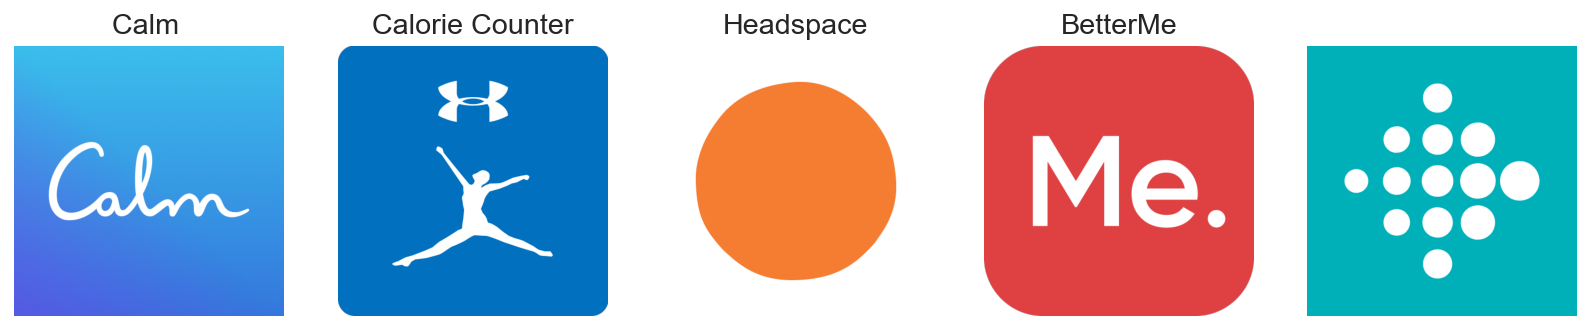

In [9]:
def format_title(title):
    sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
    if sep_index != -1:
        title = title[:sep_index]
        return title[:15]
fig, axs = plt.subplots(1,5,figsize=(14, 5))

for i, ax in enumerate(axs.flat):
    ai = app_infos[i]
    img = plt.imread(ai['icon'])
    ax.imshow(img)
    ax.set_title(format_title(ai['title']))
    ax.axis('off')

### Obtaining app reviews:

In [10]:
help(reviews)

Help on function reviews in module google_play_scraper.features.reviews:

reviews(app_id, lang=None, country=None, sort=None, count=None, filter_score_with=None, continuation_token=None)



In [11]:
#looking at reviews function and learning...
calm, continuation_token = reviews('com.calm.android', lang='en', country='us',sort=Sort.MOST_RELEVANT, count=3)
calm

[{'reviewId': 'gp:AOqpTOFHTAQU4MK4zFR3nKvcr2UcPfsXLjzUnkM3GEWMmebUgAUlJvTLi1onT58ly7C1-S3PJxTzttJ75p6zew',
  'userName': 'Kylie O',
  'userImage': 'https://lh3.googleusercontent.com/a-/AOh14GjfnpIyVfVR3JncMp6avLagPyq7K_7FMVXXb4_Ts3Y',
  'content': 'this app is really great other than the fact that so much of the content has to be paid for with a yearly subscription fee ($70). for example, you can only listen to the first day of (any) meditations for free; to listen to the rest of the days, you have to have that subscription i mentioned. there are zero free sleep stories. you can\'t listen to your "daily calm," unless you\'re subscribed as said before. the main thing that\'s free is music. please make more of the app accessible to more people.',
  'score': 3,
  'thumbsUpCount': 79,
  'reviewCreatedVersion': '4.29',
  'at': datetime.datetime(2020, 7, 15, 5, 49, 42),
  'replyContent': None,
  'repliedAt': None},
 {'reviewId': 'gp:AOqpTOEtH7HaDAyL040EXcXI6-NkTLq5pFhVhAmuJPBr-6gPJS9VQE50n8g

saving for api usage: 
https://github.com/JoMingyu/google-play-scraper

better than this one: 
https://github.com/facundoolano/google-play-scraper#reviews


In [12]:
#iterating through each of the app packages to grab reviews on each grabbing 10K each based on relevance
results = []
for ap in tqdm(app_packages):
    result, continuation_token = reviews(
    ap,
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT SQL-like calls
    count = 10000, # defaults to 100, returns number of records you want
    filter_score_with=None) # defaults to None(means all score) might be usefull to scrape some more low scores if needed
    
    for a in result:
        a['application'] = ap #tracking which app we grabbed review of
        
    results.extend(result)

100%|██████████| 5/5 [02:10<00:00, 26.15s/it]


In [13]:
len(results)

50000

In [14]:
#creating files to work from and .csv if needed
app_reviews_df = pd.DataFrame(results)
app_reviews_df.to_csv('reviews.csv', index=None, header=True)

## Data Description

|**Field**  | **Description**|
|--|--|
|ReviewId | a unique identifier for each review|
|userName  | Name of user that reviewed the product|
|userImage | User avatar
|content | The text supporting the stars assigned at the review|
|thumbsUpCount | count of how many other users appreciated the review (helps for relevance)|
|reviewCreatedVersion | The version of the app being reviewed|
|at | the review date
|replyContent | Text/content if there is a reply to a review from the app administrators|
|repliedAt | Timestamp for the replyContent field
|application| the app being reviewed


In [15]:
app_reviews_df.head()

reviewId        userName  \
0  gp:AOqpTOFHTAQU4MK4zFR3nKvcr2UcPfsXLjzUnkM3GEW...         Kylie O   
1  gp:AOqpTOEtH7HaDAyL040EXcXI6-NkTLq5pFhVhAmuJPB...  Brogan Houston   
2  gp:AOqpTOFmBONsD3tG_5tZgog9IkiysT_NoJDBhMw59w2...        J Zapata   
3  gp:AOqpTOEy__Hsix8SgQW5-8djW2RqnS3Yfp9cTsJPk8G...    Aubrey Karim   
4  gp:AOqpTOEo6tEqWbct_QhBPKwZCo75IY07QBP7buZaVXg...    Larra Snyder   

                                           userImage  \
0  https://lh3.googleusercontent.com/a-/AOh14Gjfn...   
1  https://lh3.googleusercontent.com/-We6TPXjnrQ8...   
2  https://lh3.googleusercontent.com/a-/AOh14Gi1I...   
3  https://lh3.googleusercontent.com/-_V1wVCSPVrw...   
4  https://lh3.googleusercontent.com/a-/AOh14GjbY...   

                                             content  score  thumbsUpCount  \
0  this app is really great other than the fact t...      3             79   
1  I don't care about all the sleep stories, I ju...      1            169   
2  Not worth the try, ALL is locked unless you ge...      2             40   
3  This app is great for sleep and for meditation...      4             37   
4  Love it, but... With the world how it is (woo ...      1             79   

  reviewCreatedVersion                  at replyContent repliedAt  \
0                 4.29 2020-07-15 05:49:42         None       NaT   
1                 4.29 2020-07-11 09:06:57         None       NaT   
2                 4.29 2020-07-15 06:12:47         None       NaT   
3                 4.29 2020-07-07 16:40:53         None       NaT   
4                 4.28 2020-06-25 04:29:39         None       NaT   

        application  
0  com.calm.android  
1  com.calm.android  
2  com.calm.android  
3  com.calm.android  
4  com.calm.android

# Scrub / Clean

In [16]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
reviewId                50000 non-null object
userName                50000 non-null object
userImage               50000 non-null object
content                 50000 non-null object
score                   50000 non-null int64
thumbsUpCount           50000 non-null int64
reviewCreatedVersion    45215 non-null object
at                      50000 non-null datetime64[ns]
replyContent            19587 non-null object
repliedAt               19587 non-null datetime64[ns]
application             50000 non-null object
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 4.2+ MB


**Target value counts:**

In [17]:
app_reviews_df['score'].value_counts()

5    20397
1    13889
4     6710
3     4566
2     4438
Name: score, dtype: int64

**Observation:** The intentional choice to select the most relevant reviews has paid off, it's good to see a mix of postive and negative reviews and not as imbalanced as in cases past.  :-P  'will need to look into missing data.

### Missing Data:

In [18]:
import missingno as msno

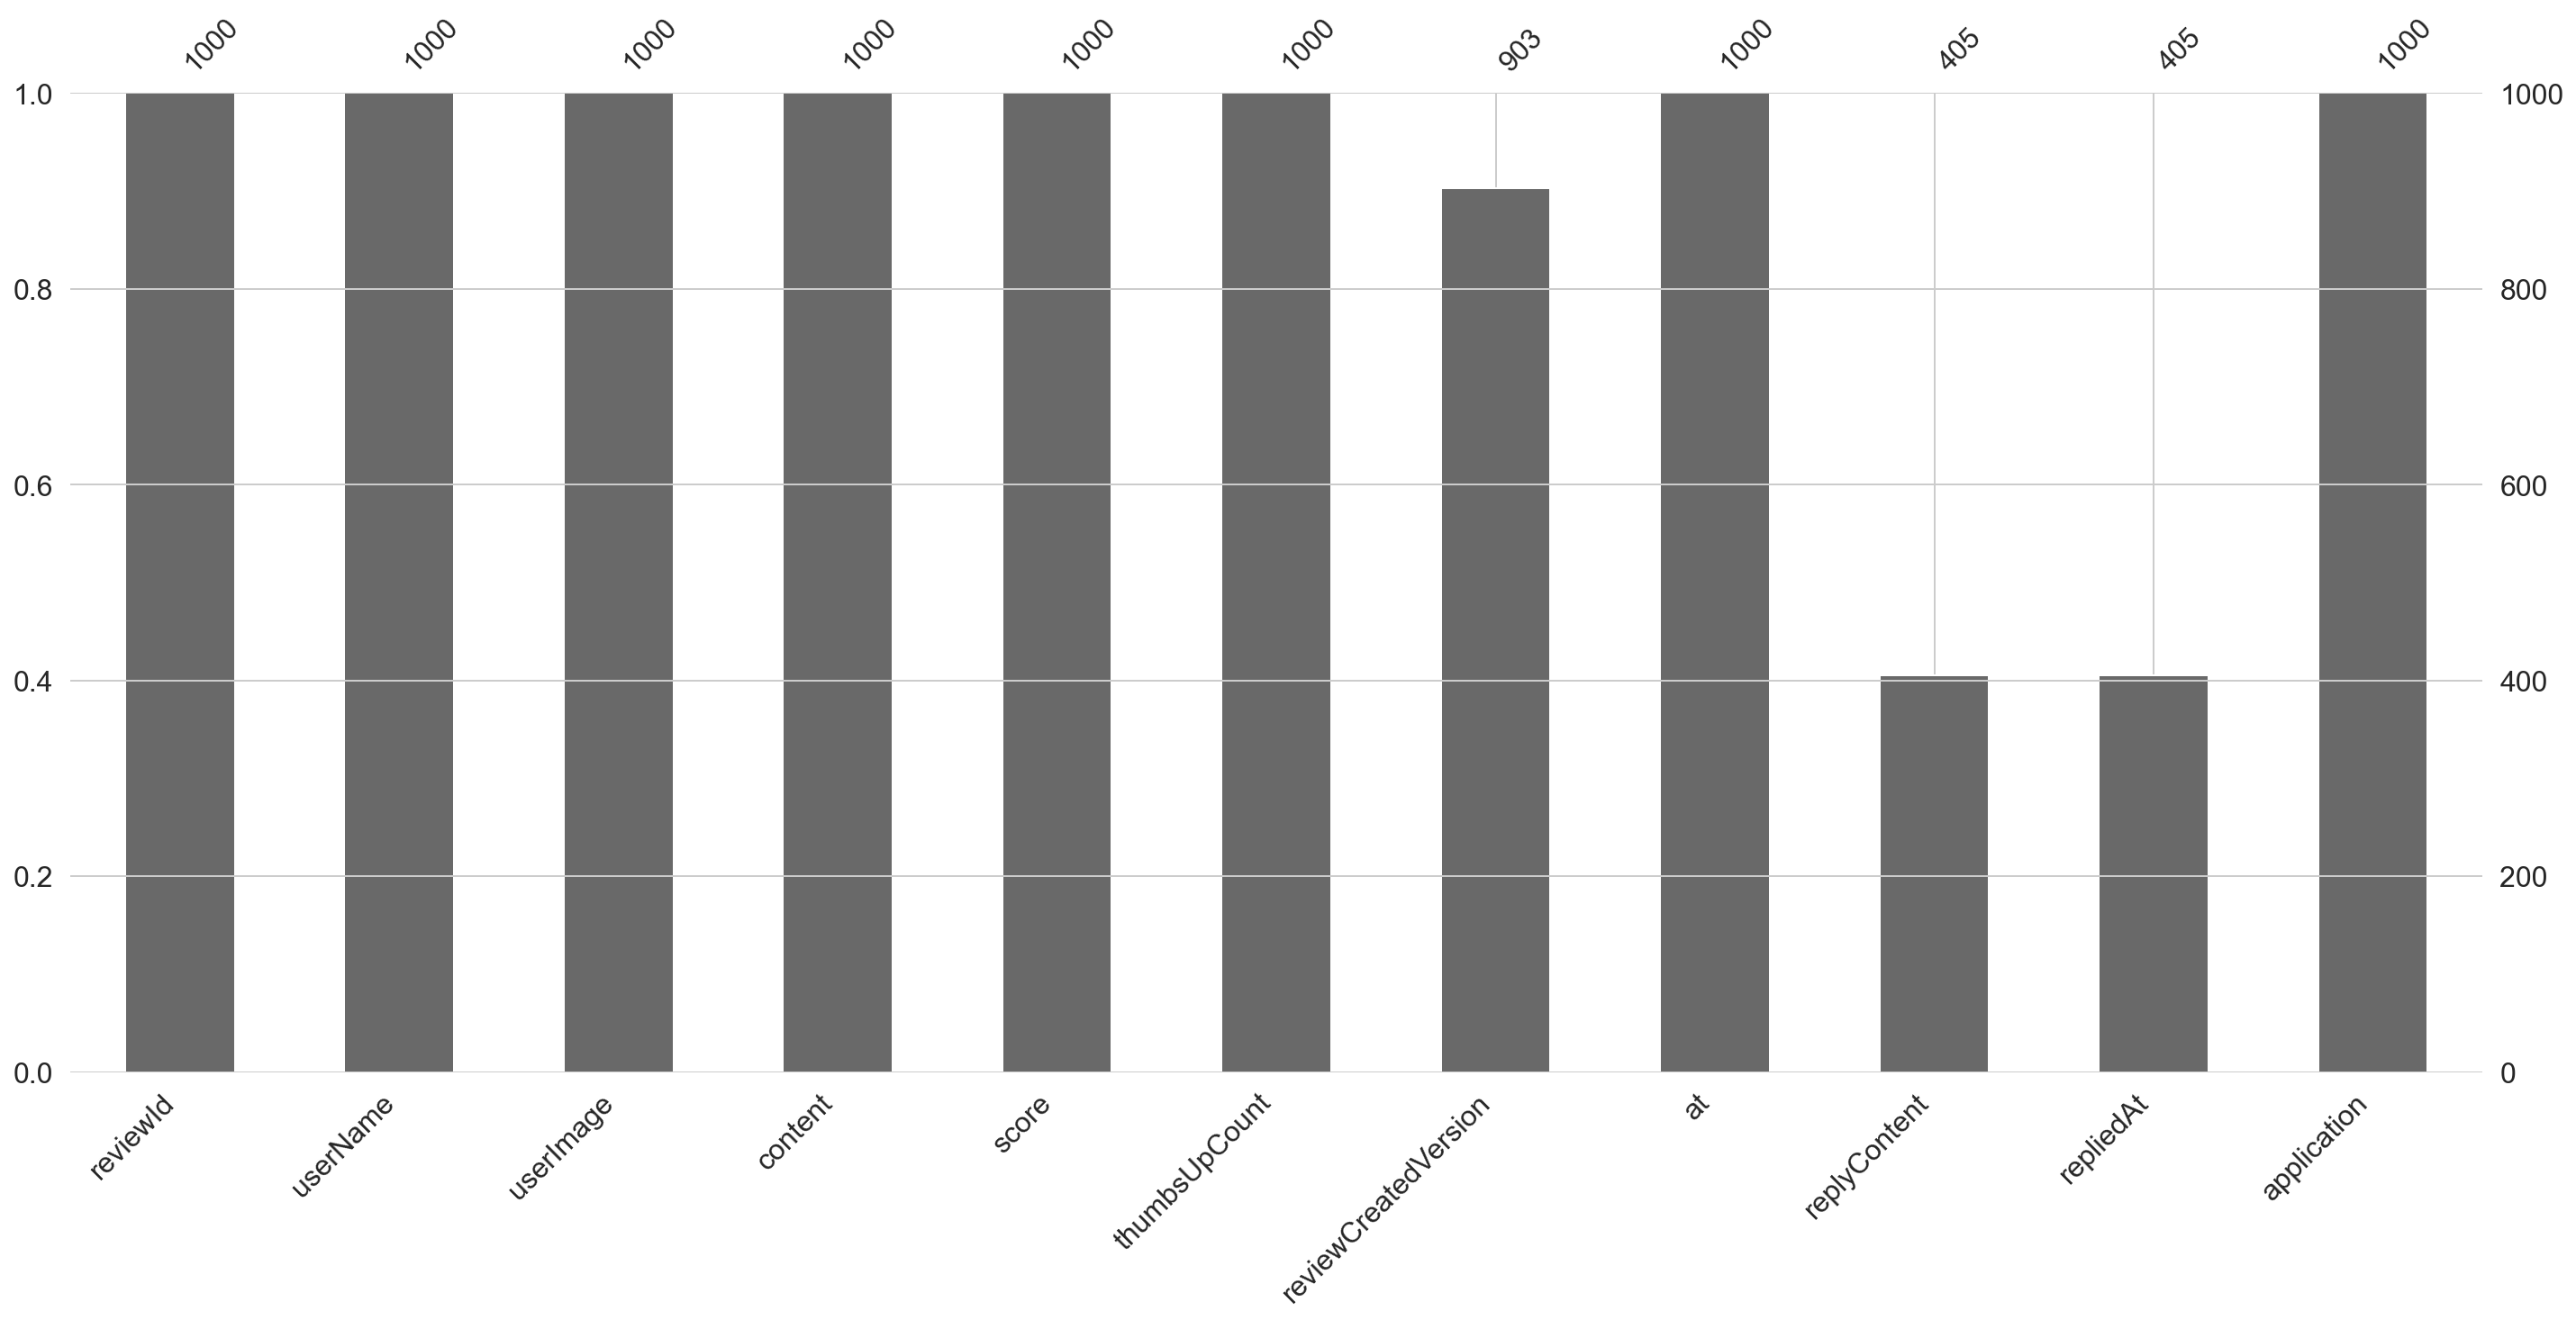

In [19]:
msno.bar(app_reviews_df.sample(1000))

In [20]:
#reviewCreatedVersion is almost 10% of the data... for now filling in with a '.' to keep the data numeric'
#and previewing the data to look for obvious patterns 
missingvers = app_reviews_df.loc[app_reviews_df['reviewCreatedVersion'].isna()]
missingvers.head()

reviewId        userName  \
3374  gp:AOqpTOHHzVfRFFx02_pboUPgl9auLUiPOjcRtTfQXWk...     Boat Smitty   
3396  gp:AOqpTOH1fNkpwyGGdI7nsB2Lp3oM7BSHtyGy66_WrW_...       Riru Isla   
3397  gp:AOqpTOFsITLloZrPfhSYK_A9s5dmo2VegsxXKhVo7uQ...   Niall Goddard   
3399  gp:AOqpTOE8Eb6zN0PndR2BzsNiX8Eom3fZsVgwjpRZ9kd...  Brazil Uluwita   
3409  gp:AOqpTOG1tmYDVVVvP7SaL9Q0PWG_ygEwpzGShKTeJHW...      Meagan Lai   

                                              userImage  \
3374  https://lh3.googleusercontent.com/a-/AOh14GgYD...   
3396  https://lh3.googleusercontent.com/a-/AOh14GhI0...   
3397  https://lh3.googleusercontent.com/a-/AOh14Gg9H...   
3399  https://lh3.googleusercontent.com/a-/AOh14GiiV...   
3409  https://lh3.googleusercontent.com/-__XjWddWJNI...   

                                                content  score  thumbsUpCount  \
3374  I struggle with anxiety and depression (as man...      5              0   
3396  The idea is great, but don't let the Facebook ...      2              0   
3397  Well, it's a big shame. This app looked really...      1              0   
3399  I downloaded this application and immediately ...      1              0   
3409  Won't let me cancel subscription. I signed up ...      1              0   

     reviewCreatedVersion                  at replyContent repliedAt  \
3374                 None 2020-06-21 10:52:55         None       NaT   
3396                 None 2020-06-16 21:19:43         None       NaT   
3397                 None 2020-06-29 09:39:59         None       NaT   
3399                 None 2020-07-09 08:59:47         None       NaT   
3409                 None 2020-06-22 21:37:51         None       NaT   

           application  
3374  com.calm.android  
3396  com.calm.android  
3397  com.calm.android  
3399  com.calm.android  
3409  com.calm.android

In [21]:
app_reviews_df['reviewCreatedVersion'].fillna('.', inplace=True)

In [23]:
#creating a field to indicate whether or not someone replied to a review
app_reviews_df['replied'] = app_reviews_df['replyContent'].notnull()
app_reviews_df['replied'].value_counts(normalize=True)

False    0.60826
True     0.39174
Name: replied, dtype: float64

In [24]:
app_reviews_df['replyContent'].fillna('n/a', inplace=True)
app_reviews_df['repliedAt'].fillna('_', inplace=True)

In [25]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
reviewId                50000 non-null object
userName                50000 non-null object
userImage               50000 non-null object
content                 50000 non-null object
score                   50000 non-null int64
thumbsUpCount           50000 non-null int64
reviewCreatedVersion    50000 non-null object
at                      50000 non-null datetime64[ns]
replyContent            50000 non-null object
repliedAt               50000 non-null object
application             50000 non-null object
replied                 50000 non-null bool
dtypes: bool(1), datetime64[ns](1), int64(2), object(8)
memory usage: 4.2+ MB


### Dropping columns: 

In [26]:
#there are no reviewIds that are duplicated, see no value in this content so dropping
app_reviews_df['reviewId'].duplicated().value_counts()

False    50000
Name: reviewId, dtype: int64

In [27]:
app_reviews_df.drop('reviewId', axis=1, inplace=True)

In [28]:
app_reviews_df['userImage'][8]
#not focus of this project so dropping images
app_reviews_df.drop('userImage', axis=1, inplace=True)

In [29]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
userName                50000 non-null object
content                 50000 non-null object
score                   50000 non-null int64
thumbsUpCount           50000 non-null int64
reviewCreatedVersion    50000 non-null object
at                      50000 non-null datetime64[ns]
replyContent            50000 non-null object
repliedAt               50000 non-null object
application             50000 non-null object
replied                 50000 non-null bool
dtypes: bool(1), datetime64[ns](1), int64(2), object(6)
memory usage: 3.5+ MB


# Explore

## 👀 A first look at the data: Ratings Across Apps

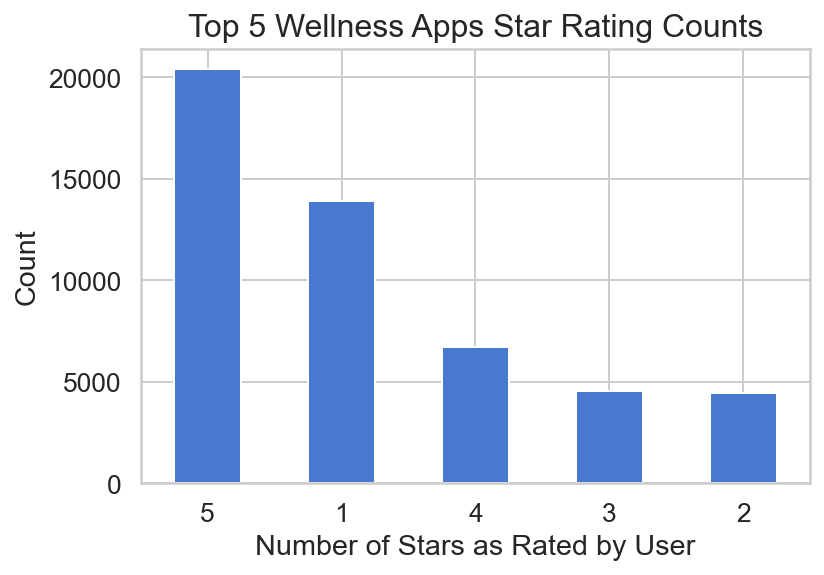

In [30]:
#counting how many reviews fall into each category
app_reviews_df['score'].value_counts().plot(kind='bar')
plt.title('Top 5 Wellness Apps Star Rating Counts', fontsize=16)
plt.xlabel('Number of Stars as Rated by User')
plt.xticks(rotation=0) 
plt.ylabel('Count')
plt.show()

>**Observation:** Top and bottom ratings are the most frequently occuring accross all 5 apps.  Also noting that these categories are the most informative since they are the highest and lowest rated scores. The accompanying content of a review could inform best practice as well as greatest opportunity to improve and is the intentional objective of this work.

In [31]:
app_reviews_df['application'].value_counts()

com.calm.android                10000
com.myfitnesspal.android        10000
com.fitbit.FitbitMobile         10000
com.gen.workoutme               10000
com.getsomeheadspace.android    10000
Name: application, dtype: int64

### 👀 Comparing Apps in Terms of Ratings:

In [32]:
#creating a dataframe for each app for potential future use
calm_df = app_reviews_df[app_reviews_df['application'] == 'com.calm.android']
fitpal_df = app_reviews_df[app_reviews_df['application'] == 'com.myfitnesspal.android']
me_df = app_reviews_df[app_reviews_df['application'] == 'com.gen.workoutme']
headspace_df = app_reviews_df[app_reviews_df['application'] == 'com.getsomeheadspace.android']
fitbit_df = app_reviews_df[app_reviews_df['application'] == 'com.fitbit.FitbitMobile']

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
# fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(12,9))

# for app in app_reviews_df['application'].unique():
#     app.value_counts().plot(kind='bar', title=app)

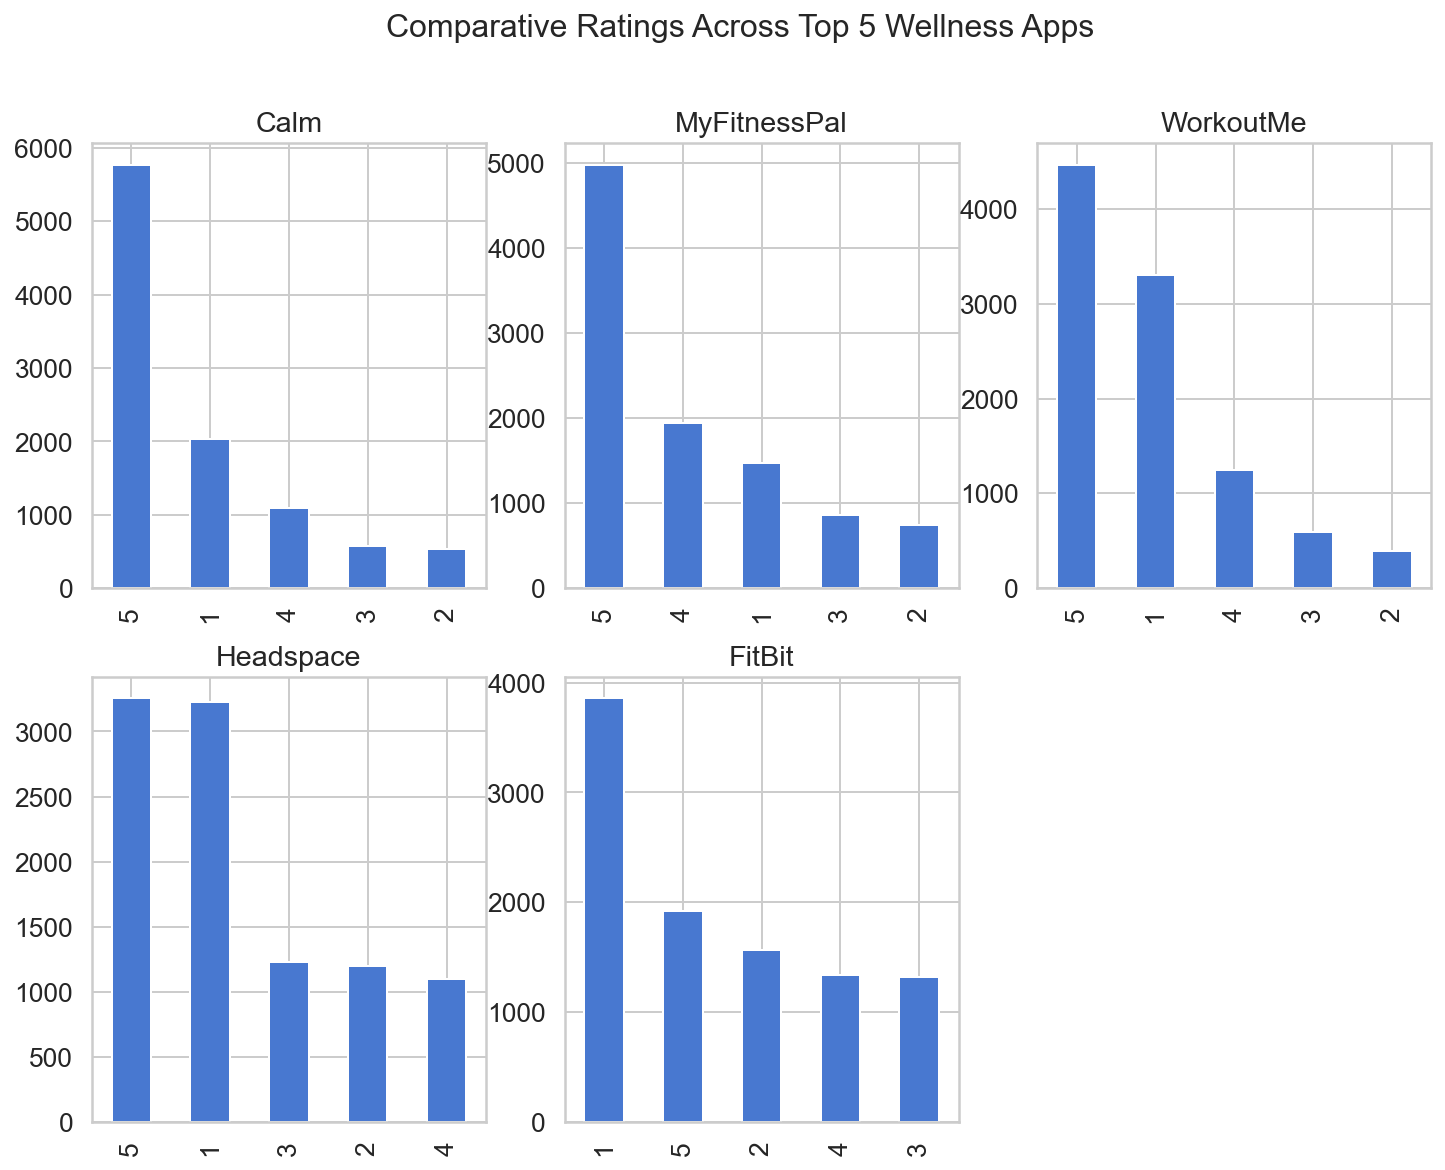

In [34]:
#comparing each app in terms of ratings(need to clean code see subsequent cells)
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(12,9))
calm_df['score'].value_counts().plot(kind='bar',ax=axs[0][0], title='Calm')
fitpal_df['score'].value_counts().plot(kind='bar', ax=axs[0][1], title='MyFitnessPal')
me_df['score'].value_counts().plot(kind='bar', ax=axs[0][2], title='WorkoutMe')
headspace_df['score'].value_counts().plot(kind='bar', ax=axs[1][0], title='Headspace')
fitbit_df['score'].value_counts().plot(kind='bar', ax=axs[1][1], title='FitBit')
fig.delaxes(ax=axs[1][2])

fig.suptitle('Comparative Ratings Across Top 5 Wellness Apps', fontsize=16)

for ax in axs:
    plt.show()


>**Observation:**  5s and 1's are the most frequent in most cases with the exception of MyFitnessPal.  Interesting comparing mediations... Calm has more than 2X 5 star ratings and headspace has almost equal 1* and 5* ratings!?! Fitbit has a majority count of 1* ratings?? AND is among top grossing apps? need to look at versions....(and up my coding game to better document and not look so noobie)

In [35]:
app_reviews_df.head()

userName                                            content  score  \
0         Kylie O  this app is really great other than the fact t...      3   
1  Brogan Houston  I don't care about all the sleep stories, I ju...      1   
2        J Zapata  Not worth the try, ALL is locked unless you ge...      2   
3    Aubrey Karim  This app is great for sleep and for meditation...      4   
4    Larra Snyder  Love it, but... With the world how it is (woo ...      1   

   thumbsUpCount reviewCreatedVersion                  at replyContent  \
0             79                 4.29 2020-07-15 05:49:42          n/a   
1            169                 4.29 2020-07-11 09:06:57          n/a   
2             40                 4.29 2020-07-15 06:12:47          n/a   
3             37                 4.29 2020-07-07 16:40:53          n/a   
4             79                 4.28 2020-06-25 04:29:39          n/a   

  repliedAt       application  replied  
0         _  com.calm.android    False  
1         _  com.calm.android    False  
2         _  com.calm.android    False  
3         _  com.calm.android    False  
4         _  com.calm.android    False

### df1: Squeaky wheels get the grease? Looking into how often a repeat reviewer gets replied to.

In [36]:
#creating a copy of file for eda
df = app_reviews_df.copy()

In [37]:
#Hypothesising replyContent is in response to reviews - probably bad ones - 
#isolating only those with replyContent:
df1 = df[df['replyContent']!='n/a']

In [38]:
df1['score'].value_counts(normalize=True)

1    0.463777
5    0.239853
2    0.127380
3    0.089651
4    0.079338
Name: score, dtype: float64

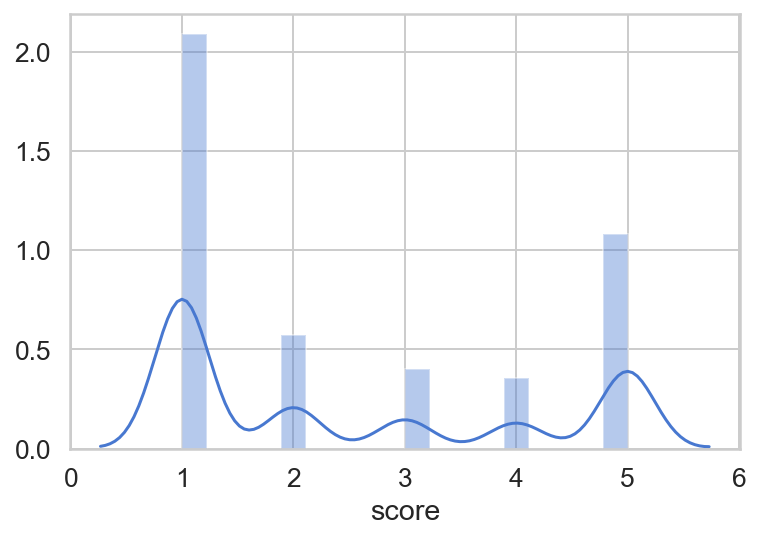

In [39]:
reply_content_counts = df1['score']
sns.distplot(reply_content_counts)

**Majority (~ 46%) scores for replyContent response are 1 star reviews...  confirms hypothesis that this field is in response to poor reviews see examples below, but also gives insight that responses also occur for most positive comments as well (24%)**

### 👀 NEEDS DEV: Which app replies more?

Rating: 5 stars


com.gen.workoutme               4465
com.getsomeheadspace.android      99
com.fitbit.FitbitMobile           59
com.myfitnesspal.android          58
com.calm.android                  17
Name: application, dtype: int64


--------
Rating: 1 stars


com.gen.workoutme               3305
com.getsomeheadspace.android    1890
com.fitbit.FitbitMobile         1338
com.myfitnesspal.android        1319
com.calm.android                1232
Name: application, dtype: int64


--------
Rating: 2 stars


com.getsomeheadspace.android    722
com.myfitnesspal.android        643
com.fitbit.FitbitMobile         542
com.gen.workoutme               389
com.calm.android                199
Name: application, dtype: int64


--------
Rating: 3 stars


com.getsomeheadspace.android    661
com.gen.workoutme               590
com.fitbit.FitbitMobile         475
com.myfitnesspal.android         19
com.calm.android                 11
Name: application, dtype: int64


--------
Rating: 4 stars


com.gen.workoutme               1244
com.fitbit.FitbitMobile          137
com.getsomeheadspace.android      92
com.myfitnesspal.android          64
com.calm.android                  17
Name: application, dtype: int64


--------


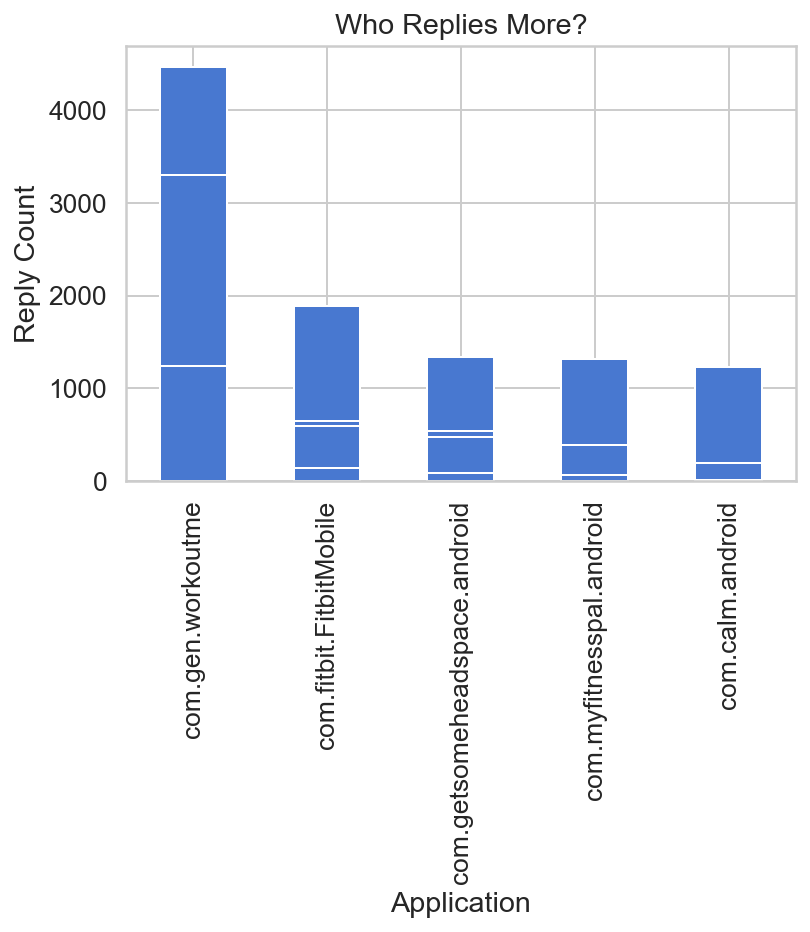

In [40]:
for group in list(df1['score'].unique()):
    reply_count = df1.groupby('score').get_group(group)['application'].value_counts()
    print(f'Rating: {group} stars')
    display(reply_count)
    print()
    print('--------')
    #cmap = {5:'blue', 4:'turquoise', 3:'lightblue', 2:'lightgreen',1:'green' }
    reply_count.plot(kind='bar', title=('Who Replies More?'))
    plt.xlabel('Application')
    plt.ylabel('Reply Count')


### A look at 'repeat reviewers':

In [41]:
repeat_comments = app_reviews_df[app_reviews_df.duplicated(['userName','application'], keep=False)].sort_values('userName')
print(f'The set of repeat reviewers is {len(repeat_comments)} rows.')
av_score = round(repeat_comments['score'].mean(),1)
print(f'The average score of repeat reviers is {av_score}')
repeat_comments


The set of repeat reviewers is 1766 rows.
The average score of repeat reviers is 3.4


userName                                            content  \
28710            A D  Disappointed with the direction this app is he...   
20907            A D  Shuts down, over priced confusing subscription...   
27357            A D  Impossible to download anything for offline us...   
26655  A Google user  I saw your ad on youtube. It was presented ver...   
28007  A Google user  It's a great app if you never mediated and wan...   
...              ...                                                ...   
23349            h k  Hey guys, first of all, I adore this app like ...   
29727              m  It won't even let me sign up for the app. Ever...   
24312              m  Most annoying ads of your app always show up i...   
48419            sal  What a load of rubbish. this app use to update...   
42156            sal  great app, only one thing that needs sorting w...   

       score  thumbsUpCount reviewCreatedVersion                  at  \
28710      1              1                3.6.7 2018-09-15 17:48:10   
20907      1              0               3.57.0 2020-06-17 23:31:05   
27357      1              0               3.27.0 2019-07-18 00:29:59   
26655      5              0                3.7.0 2018-09-25 19:07:00   
28007      5              0                3.7.4 2018-10-24 16:30:02   
...      ...            ...                  ...                 ...   
23349      5              1               3.35.0 2019-10-05 02:33:54   
29727      1              2               3.44.2 2019-12-01 13:31:07   
24312      1             11                3.7.0 2018-09-21 16:14:21   
48419      1              1                 3.18 2020-04-06 00:15:56   
42156      5              1               3.22.1 2020-06-09 00:33:27   

                                            replyContent            repliedAt  \
28710  Hey there,\n\nThanks for sharing your thoughts...  2018-09-16 11:18:35   
20907                                                n/a                    _   
27357  Thank you for reaching out. We are sorry for t...  2019-07-18 04:42:40   
26655                                                n/a                    _   
28007                                                n/a                    _   
...                                                  ...                  ...   
23349                                                n/a                    _   
29727                                                n/a                    _   
24312                                                n/a                    _   
48419                                                n/a                    _   
42156                                                n/a                    _   

                        application  replied  
28710  com.getsomeheadspace.android     True  
20907  com.getsomeheadspace.android    False  
27357  com.getsomeheadspace.android     True  
26655  com.getsomeheadspace.android    False  
28007  com.getsomeheadspace.android    False  
...                             ...      ...  
23349  com.getsomeheadspace.android    False  
29727  com.getsomeheadspace.android    False  
24312  com.getsomeheadspace.android    False  
48419       com.fitbit.FitbitMobile    False  
42156       com.fitbit.FitbitMobile    False  

[1766 rows x 10 columns]

In [42]:
repeat_comments['userName'].value_counts(normalize=True)

A Google user     0.747452
M                 0.004530
Jessica           0.003964
Sarah             0.003398
Sam               0.003398
                    ...   
D B               0.001133
Gemma Brown       0.001133
Diana N.          0.001133
Diane Robinson    0.001133
Ann R             0.001133
Name: userName, Length: 199, dtype: float64

>**Observation** 'A Google user' occurs is 75% of cases... what about 'Sal'?

In [48]:
repeat_comments.loc[repeat_comments['userName']=='sal']['content']

48419    What a load of rubbish. this app use to update...
42156    great app, only one thing that needs sorting w...
Name: content, dtype: object

>'Sal' and 'A Google user' demonstrates that usernames can be duplicated and might not be as relevant in identifying unique users.

In [50]:
#creating a way to track if someone was replied to 
repeat_comments['wasrepliedto'] = repeat_comments['replyContent']!='n/a'

In [51]:
#investigating how often someone was replied to in this sample:
round(repeat_comments['wasrepliedto'].value_counts(normalize=True),2)

False    0.59
True     0.41
Name: wasrepliedto, dtype: float64

In [51]:
df1.head()

userName                                            content  \
83   Adrianne Lilley  Fixed!! Fastest turnaround I've ever seen Than...   
114        music mix  I only use the app during the free trial becau...   
196      Shamik Saha  Agree with Gianna. Earlier a lot of stuff was ...   
205   Mouse Scarbrow  This disgustingly priced ($70) app with limite...   
223     sasha pierce  It keeps crashing. Even when I uninstalled and...   

     score  thumbsUpCount reviewCreatedVersion                  at  \
83       5              4                 4.29 2020-07-08 14:59:10   
114      1              3                 4.29 2020-07-06 09:06:07   
196      1            533                 4.26 2020-05-23 23:43:19   
205      1            185                 4.24 2020-04-25 19:08:52   
223      1            150                 4.25 2020-05-05 23:31:30   

                                          replyContent            repliedAt  \
83   Hi there, I'm so sorry for the trouble! We've ...  2019-07-10 14:25:32   
114  Apologies for the trouble. We do offer monthly...  2020-04-22 14:10:28   
196  Apologies for the trouble. Please reach out vi...  2020-05-15 22:30:04   
205  Hi there, We offer a free version of the app i...  2020-04-27 13:55:16   
223  Apologies for the trouble. Please reach out vi...  2020-05-05 23:52:08   

          application  replied  
83   com.calm.android     True  
114  com.calm.android     True  
196  com.calm.android     True  
205  com.calm.android     True  
223  com.calm.android     True

In [62]:
df1.groupby('score').get_group(5)['thumbsUpCount'].mean()

1.1264367816091954

In [ ]:
#pd.set_option('display.max_colwidth', -1)

userImage - can drop - not relevant to this work

In [ ]:
#trying to simplify code..and failing
# list_of_dfs = [calm_df, fitpal_df, me_df, headspace_df, fitbit_df]
# for df in list_of_dfs:
#     df['score'].value_counts().plot(kind='bar')

In [ ]:
# fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(12,9))
# for df in list_of_dfs:
#     df['score'].value_counts().plot(kind='bar',title='df')
#     fig.delaxes(ax=axs[1][2])
#     ax.get_subplotspec().rowspan.start
#     fig.suptitle('Comparative Ratings Across Top 5 Wellness Apps', fontsize=16)

In [108]:
df1.head()

userName                                            content  \
83   Adrianne Lilley  Fixed!! Fastest turnaround I've ever seen Than...   
119        music mix  I only use the app during the free trial becau...   
204      Shamik Saha  Agree with Gianna. Earlier a lot of stuff was ...   
213   Mouse Scarbrow  This disgustingly priced ($70) app with limite...   
230     sasha pierce  It keeps crashing. Even when I uninstalled and...   

     score  thumbsUpCount reviewCreatedVersion                  at  \
83       5              4                 4.29 2020-07-08 14:59:10   
119      1              3                 4.29 2020-07-06 09:06:07   
204      1            533                 4.26 2020-05-23 23:43:19   
213      1            185                 4.24 2020-04-25 19:08:52   
230      1            150                 4.25 2020-05-05 23:31:30   

                                          replyContent            repliedAt  \
83   Hi there, I'm so sorry for the trouble! We've ...  2019-07-10 14:25:32   
119  Apologies for the trouble. We do offer monthly...  2020-04-22 14:10:28   
204  Apologies for the trouble. Please reach out vi...  2020-05-15 22:30:04   
213  Hi there, We offer a free version of the app i...  2020-04-27 13:55:16   
230  Apologies for the trouble. Please reach out vi...  2020-05-05 23:52:08   

          application  replied  
83   com.calm.android     True  
119  com.calm.android     True  
204  com.calm.android     True  
213  com.calm.android     True  
230  com.calm.android     True

### Versions

In [69]:
#looking for various app versions to perhaps evauluate ratings based on version improvements? 
#245 versions between the 5 apps
app_reviews_df['reviewCreatedVersion'].value_counts()

.          4785
3.21       1908
20.7.0     1835
20.11.1    1434
20.10.0    1294
           ... 
2.0.8         1
3.4.1         1
2.6.2         1
3.1.2         1
2.2.1         1
Name: reviewCreatedVersion, Length: 251, dtype: int64

Comparing highest rated and lowest rated fitness-baesd apps by version count:

In [70]:
#Isolating myfitnesspal app to see how many versions: 15 
app_reviews_df.groupby('application').get_group('com.myfitnesspal.android')['reviewCreatedVersion'].value_counts()

20.7.0     1835
20.11.1    1434
20.10.0    1294
20.9.0     1155
20.2.1      915
20.6.1      874
20.1.0      644
20.12.0     496
20.5.0      394
20.6.0      392
20.3.0      268
20.4.1      150
20.11.0     123
20.8.0       16
20.13.0       6
20.4.0        4
Name: reviewCreatedVersion, dtype: int64

In [71]:
app_reviews_df.groupby('application').get_group('com.fitbit.FitbitMobile')['reviewCreatedVersion'].value_counts()

3.21      1908
3.23      1170
3.24      1147
3.20       917
3.22.1     771
3.19.2     753
3.18       544
3.13       525
3.25       479
3.14       422
3.19.1     420
3.16       369
3.17       291
3.15       235
3.22        47
3.19         2
Name: reviewCreatedVersion, dtype: int64

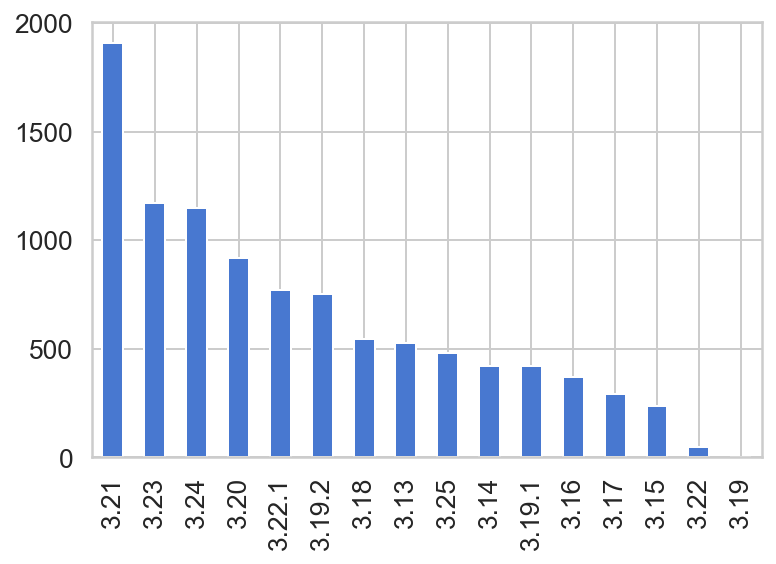

In [72]:
#Isolating fitbit app to see how many versions: 17 
app_version_fitbit = app_reviews_df.groupby('application').get_group('com.fitbit.FitbitMobile')['reviewCreatedVersion'].value_counts()
app_version_fitbit.plot(kind='bar')

In [73]:
app_version_fitbit.head()

3.21      1908
3.23      1170
3.24      1147
3.20       917
3.22.1     771
Name: reviewCreatedVersion, dtype: int64

In [66]:
fitbit_df[fitbit_df['reviewCreatedVersion']=='3.21']['score'].value_counts(normalize=True)

1    0.331761
5    0.235325
2    0.152516
4    0.140985
3    0.139413
Name: score, dtype: float64

People didn't like version 3.21 of fitbit, it appears that versions 3.23 and 3.24 seem to be better

In [ ]:
#!pip install interact


In [74]:
# Clean this up to look at versions...
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

### 👀 Version Comparison 

In [75]:
@interact(x=list(app_reviews_df['application'].unique()))
def plt_compare(x):
    fig = plt.figure(figsize=(12,10))
    count = len(app_reviews_df.groupby('application').get_group(x)['reviewCreatedVersion'].unique())
    app_reviews_df.groupby('application').get_group(x)['reviewCreatedVersion'].hist(bins='auto')
    plt.xlabel('Version')
    plt.ylabel('Number of Reviews')
    plt.xticks(rotation=45, fontsize=6) 
    print(f'Version Count : {count}')

interactive(children=(Dropdown(description='x', options=('com.calm.android', 'com.myfitnesspal.android', 'com.…

In [76]:
calm_df[calm_df['reviewCreatedVersion']=='4.20']['score'].value_counts(normalize=True)

5    0.766292
4    0.125843
1    0.069663
3    0.031461
2    0.006742
Name: score, dtype: float64

>**Observation:** Some versions with high review counts get better reviews and some get worse, but versions with high levels of 1's could inform improvements

In [77]:
import plotly.express as px

# WHY does this look funny?

In [78]:
fitbit_df.head()

userName                                            content  \
40000  Kristie Parsons  Worked great, but with the recent update it no...   
40001     Mike Schulze  Active minutes aren't shown correctly in the q...   
40002          Yakup M  First of all, I am a network administrator, we...   
40003   Dolly Cosgrave  After the last update I can't connect to my Wi...   
40004            Carol  I am so unhappy with my fitbit charge 3. First...   

       score  thumbsUpCount reviewCreatedVersion                  at  \
40000      4            294                 3.25 2020-07-12 17:38:18   
40001      2             56                 3.24 2020-07-02 05:23:44   
40002      1             32                 3.25 2020-07-14 21:23:28   
40003      1             31                 3.25 2020-07-14 17:06:57   
40004      1             41                 3.24 2020-07-02 09:19:51   

      replyContent repliedAt              application  replied  
40000          n/a         _  com.fitbit.FitbitMobile    False  
40001          n/a         _  com.fitbit.FitbitMobile    False  
40002          n/a         _  com.fitbit.FitbitMobile    False  
40003          n/a         _  com.fitbit.FitbitMobile    False  
40004          n/a         _  com.fitbit.FitbitMobile    False

In [79]:
import plotly.express as px

In [80]:
px.scatter(fitbit_df, x='reviewCreatedVersion', y='score')

In [81]:
calm_df.head()

userName                                            content  score  \
0         Kylie O  this app is really great other than the fact t...      3   
1  Brogan Houston  I don't care about all the sleep stories, I ju...      1   
2        J Zapata  Not worth the try, ALL is locked unless you ge...      2   
3    Aubrey Karim  This app is great for sleep and for meditation...      4   
4    Larra Snyder  Love it, but... With the world how it is (woo ...      1   

   thumbsUpCount reviewCreatedVersion                  at replyContent  \
0             79                 4.29 2020-07-15 05:49:42          n/a   
1            169                 4.29 2020-07-11 09:06:57          n/a   
2             40                 4.29 2020-07-15 06:12:47          n/a   
3             37                 4.29 2020-07-07 16:40:53          n/a   
4             79                 4.28 2020-06-25 04:29:39          n/a   

  repliedAt       application  replied  
0         _  com.calm.android    False  
1         _  com.calm.android    False  
2         _  com.calm.android    False  
3         _  com.calm.android    False  
4         _  com.calm.android    False

In [89]:
fitpal_df['reviewCreatedVersion'].value_counts(normalize=True)

20.7.0     0.1835
20.11.1    0.1434
20.10.0    0.1294
20.9.0     0.1155
20.2.1     0.0915
20.6.1     0.0874
20.1.0     0.0644
20.12.0    0.0496
20.5.0     0.0394
20.6.0     0.0392
20.3.0     0.0268
20.4.1     0.0150
20.11.0    0.0123
20.8.0     0.0016
20.13.0    0.0006
20.4.0     0.0004
Name: reviewCreatedVersion, dtype: float64

In [95]:
fitpal_df[fitpal_df['score']==1]['reviewCreatedVersion'].value_counts().head()

20.7.0     415
20.11.1    250
20.10.0    138
20.2.1     133
20.6.1     110
Name: reviewCreatedVersion, dtype: int64

# Help with this one: 

In [114]:
for app in list(df['application'].unique()):
    low_score = df1[df1['score']==1]['reviewCreatedVersion'].value_counts().head(1)
    high_score = df1[df1['score']==5]['reviewCreatedVersion'].value_counts().head(1)
    
    print(f'{app}Lowest rated version and 1 star review count: {low_score}, highest rated version and 5 star review count {high_score}')
    print()

com.calm.androidLowest rated version and 1 star review count: .    2253
Name: reviewCreatedVersion, dtype: int64, highest rated version and 5 star review count 2.14.8    515
Name: reviewCreatedVersion, dtype: int64

com.myfitnesspal.androidLowest rated version and 1 star review count: .    2253
Name: reviewCreatedVersion, dtype: int64, highest rated version and 5 star review count 2.14.8    515
Name: reviewCreatedVersion, dtype: int64

com.getsomeheadspace.androidLowest rated version and 1 star review count: .    2253
Name: reviewCreatedVersion, dtype: int64, highest rated version and 5 star review count 2.14.8    515
Name: reviewCreatedVersion, dtype: int64

com.gen.workoutmeLowest rated version and 1 star review count: .    2253
Name: reviewCreatedVersion, dtype: int64, highest rated version and 5 star review count 2.14.8    515
Name: reviewCreatedVersion, dtype: int64

com.fitbit.FitbitMobileLowest rated version and 1 star review count: .    2253
Name: reviewCreatedVersion, dtype: i

# AND THIS?

In [105]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter(
    x=headspace_df['reviewCreatedVersion'], y=headspace_df['score'],
    mode='markers',
    marker=dict(
        color=['rgb(93, 164, 214)', 'rgb(255, 144, 14)',  'rgb(44, 160, 101)', 'rgb(255, 65, 54)'],
        size=[40, 60, 80, 100],
    )
)])

fig.show()

## Whats in a review?

In [117]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_list = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aosika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [116]:
#creating a df to 'clean' the content 
clean_df = df.copy()

In [ ]:
# clean_df['content'] = clean_df['content'].apply(lambda x: ' '.join([w.lower() for w in w.split() if w not in (stopwords_list)]))

# clean_df['content']

In [118]:
from importlib import reload

# why?

In [120]:
import functions as fn

ModuleNotFoundError: No module named 'functions'

# ✔️ TO DO: move to .pyfile

In [88]:
def clean_freq(text):
    '''A pre-processing function that cleans text of stopwords, punctuation and capitalization, tokenizes, lemmatizes
    then finds the most frequently used 100 words
    
    text - the text to be cleaned in string format'''

    # Get all the stop words in the English language
    from nltk.corpus import stopwords
    #importing additional functions to execute
    import string
    from nltk import FreqDist
    #importing and enstantiating lemmatizer 
    
    lemmatizer = nltk.stem.WordNetLemmatizer()
    
    stopwords_list = stopwords.words('english')

    #remove punctuation
    stopwords_list += list(string.punctuation)
    ##adding adhoc all strings that don't appear to contribute, added 'article, page and wikipedia' iteratively as 
    ##these are parts of most comment strings
    stopwords_list += ("''","``", "'s", "\\n\\n" , '...', 'i\\','\\n',
                       '•', "i", 'the', "'m", 'i\\', "'ve", "don\\'t",
                      "'re", "\\n\\ni", "it\\", "'ll", 'you\\', "'d", "n't",
                      '’', 'app', 'wa', 'ha') 
    
    from nltk import word_tokenize
    tokens = word_tokenize(text)
    lemma_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    stopped_tokens = [w.lower() for w in lemma_tokens if w.lower() not in stopwords_list]
    freqdist = FreqDist(stopped_tokens)
    most_common_stopped = freqdist.most_common(100)
    return most_common_stopped

In [84]:
def clean_tokens(text):
    '''A pre-processing function that cleans text of stopwords, punctuation and capitalization, tokenizes, lemmatizes
    then finds the most frequently used 100 words
    
    text - the text to be cleaned in string format'''

    # Get all the stop words in the English language
    from nltk.corpus import stopwords
    #importing additional functions to execute
    import string
    from nltk import FreqDist
    #importing and enstantiating lemmatizer 
    
    lemmatizer = nltk.stem.WordNetLemmatizer()
    
    stopwords_list = stopwords.words('english')

    #remove punctuation
    stopwords_list += list(string.punctuation)
    ##adding adhoc all strings that don't appear to contribute, added 'article, page and wikipedia' iteratively as 
    ##these are parts of most comment strings
    stopwords_list += ("''","``", "n't", 'app', "...", "n't",
                       "wa","ve", "ha","'", "wa", "ha") 
  
    
    from nltk import word_tokenize
    tokens = word_tokenize(text)
    lemma_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    stopped_tokens = [w.lower() for w in lemma_tokens if w.lower() not in stopwords_list]
    return stopped_tokens

In [79]:
from wordcloud import WordCloud

In [80]:
text = str(list(clean_df['content']))

In [89]:
freq_clean = clean_freq(text)
#removed the word app, as it is obvious and was most frequent by 6X the next most freqent word (36901 cases)
#removing the word

In [90]:
freq_clean

[('free', 7460),
 ('use', 7314),
 ('time', 7293),
 ('love', 6858),
 ('day', 6788),
 ('get', 6627),
 ('like', 6438),
 ('really', 6257),
 ('sleep', 6192),
 ('great', 6126),
 ('fitbit', 5951),
 ('meditation', 5894),
 ('help', 5523),
 ('good', 5389),
 ('would', 5321),
 ('work', 5191),
 ('even', 4683),
 ('one', 4014),
 ('keep', 3993),
 ('pay', 3958),
 ('subscription', 3933),
 ('doe', 3795),
 ('sync', 3741),
 ('year', 3734),
 ('food', 3714),
 ('update', 3612),
 ('calm', 3406),
 ('phone', 3399),
 ('track', 3383),
 ('much', 3359),
 ('ca', 3303),
 ('need', 3215),
 ('also', 3132),
 ('calorie', 3129),
 ('using', 3095),
 ('issue', 3080),
 ('want', 3065),
 ('thing', 2965),
 ('money', 2958),
 ('every', 2937),
 ('make', 2931),
 ('trial', 2814),
 ('easy', 2810),
 ('way', 2779),
 ('used', 2772),
 ('still', 2755),
 ('try', 2727),
 ('tried', 2649),
 ('could', 2593),
 ('month', 2477),
 ('premium', 2470),
 ('find', 2427),
 ('exercise', 2391),
 ('well', 2390),
 ('back', 2364),
 ('option', 2357),
 ('problem'

In [87]:
clean_toks = clean_tokens(text)

### 👀 Wordcloud: all apps, all reviews

In [115]:

wordcloud = WordCloud(width=500, height=300,background_color="white", max_words=5000, 
                      contour_width=3, collocations=False, contour_color='red')

wordcloud.generate(','.join(clean_toks))

wordcloud.to_image()


NameError: name 'WordCloud' is not defined

>This could be informative for highest and lowest rating

In [92]:
def clean_comment(comment):
    '''Lemmatizes, removes capitalization, punctuation and 'stopwords' from the lemmatized tokens,
    returns data in the dataframe for modeling in a "clean" state
    
    comment - a text string'''
    
    import string
    #splitting sentences into tokens
    tokens = comment.split()
    
    #instantiating Lemmatizer and lemmatizing words
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemma_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    stopwords_list = stopwords.words('english')
    stopwords_list += ("''","``", ".", 'app') 

    #remove punctuation, capitalization, and stopwords
    stopwords_list += list(string.punctuation)
    stopped_tokens = [w.lower() for w in lemma_tokens if w.lower() not in stopwords_list]
    
    return ' '.join(stopped_tokens)



In [93]:
clean_df['content'] = clean_df['content'].apply(clean_tokens)

clean_df['content']

0        [care, sleep, story, use, white, noise, freque...
1        [wonderful, last, month, shut, time, woke, las...
2        [great, sleep, meditation, however, wish, opti...
3        [love, world, woo, 2020, wanted, upgrade, long...
4        [ca, even, try, without, creating, login, insi...
                               ...                        
49995    [terrible, updated, premium, bluetooth, cant, ...
49996    [great, idea, everytime, update, fully, reconn...
49997    [love, fitbit, happened, go, open, mar, 27th, ...
49998    [happy, many, different, fitbits, since, 2014,...
49999    [versa, lite, got, xmas, sync, working, ok, ne...
Name: content, Length: 50000, dtype: object

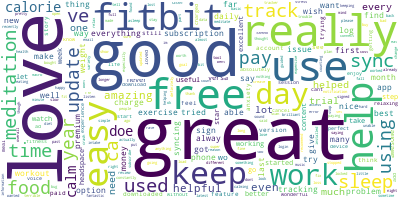

In [94]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, collocations=False, contour_color='steelblue')

wordcloud.generate(clean_df['content'].to_string())

wordcloud.to_image()

In [ ]:
## Observation on 'good': words like great, really, good, and love are obvious and not informative, nor is wa, or ha

In [95]:
import timestamp

In [96]:
import plotly.express as px

In [97]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [98]:
plt.style.use('seaborn-notebook')

# Model

Using the 'clean_df' content to model since it's been lemmatized, and stopwords have been removed, including 'app' which was used 6X more than any other word.

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
clean_df.head()

userName                                            content  \
0     Brogan Houston  [care, sleep, story, use, white, noise, freque...   
1  Marjorie Wiedeman  [wonderful, last, month, shut, time, woke, las...   
2       Aubrey Karim  [great, sleep, meditation, however, wish, opti...   
3       Larra Snyder  [love, world, woo, 2020, wanted, upgrade, long...   
4          Glenneroo  [ca, even, try, without, creating, login, insi...   

   score  thumbsUpCount reviewCreatedVersion                  at replyContent  \
0      1            135                 4.29 2020-07-11 09:06:57          n/a   
1      4             38                 4.28 2020-07-05 08:30:55          n/a   
2      4             36                 4.29 2020-07-07 16:40:53          n/a   
3      1             76                 4.28 2020-06-25 04:29:39          n/a   
4      1             50                 4.29 2020-07-07 19:32:31          n/a   

  repliedAt       application  replied  
0         _  com.calm.android    False  
1         _  com.calm.android    False  
2         _  com.calm.android    False  
3         _  com.calm.android    False  
4         _  com.calm.android    False

## Preprocessing

>Since the best in class '5 Stars' and worst in class '1 Star' reviews is what would be most informative, the data will be categorized as such: 'Good' is rated 5 Stars, 'Bad' was rated 1 Star, and 'Neutral' will be 2-4 stars.

In [101]:
stars_dict = {5:'good', 4:'neutral', 3: 'neutral', 2:'neutral', 1:'bad'}
clean_df['Target'] = clean_df['score'].map(stars_dict)

In [ ]:
#!pip install yellowbrick

In [102]:
good_clean_df = clean_df[clean_df['Target']=='good']

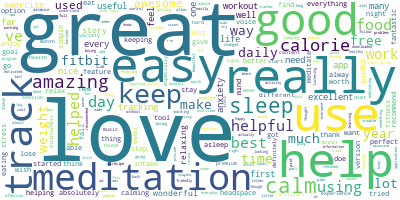

In [103]:
gcwordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, collocations=False, contour_color='steelblue')

gcwordcloud.generate(good_clean_df['content'].to_string())

gcwordcloud.to_image()

>**Observation**: words like *'love'*, *'great'*, and *'good'* are obvious and not very informative, perhaps dropping a few to render more meaningful word cloud

In [104]:
def good_clean_tokens(text):
    '''A pre-processing function that cleans text of stopwords, punctuation and capitalization, tokenizes, lemmatizes
    then finds the most frequently used 100 words
    
    text - the text to be cleaned in string format'''

    # Get all the stop words in the English language
    from nltk.corpus import stopwords
    #importing additional functions to execute
    import string
    from nltk import FreqDist
    #importing and enstantiating lemmatizer 
    
    lemmatizer = nltk.stem.WordNetLemmatizer()
    
    stopwords_list = stopwords.words('english')

    #remove punctuation
    stopwords_list += list(string.punctuation)
    ##adding adhoc all strings that don't appear to contribute, added 'love, great, good, really, amazing' iteratively as 
    ##these are parts of most comment strings
    stopwords_list += ("''","``", "n't", 'app', 'love', 'great', 'good', 'really', 'wa', 'ha',
                     '...', "'s", 'amazing', 've', 'excellent', 'awesome', 'wonderful', 'fantastic', "ve") 
  
    
    from nltk import word_tokenize
    tokens = word_tokenize(text)
    lemma_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    stopped_tokens = [w.lower() for w in lemma_tokens if w.lower() not in stopwords_list]
    return stopped_tokens

In [105]:
#pulling it back together so can further clean less meaningful words:
good_clean_df['content'] = good_clean_df['content'].apply(lambda x: ' '.join(x))

In [106]:
good_clean_df['content'] = good_clean_df['content'].apply(good_clean_tokens)

### 👀 High Rated WordCloud

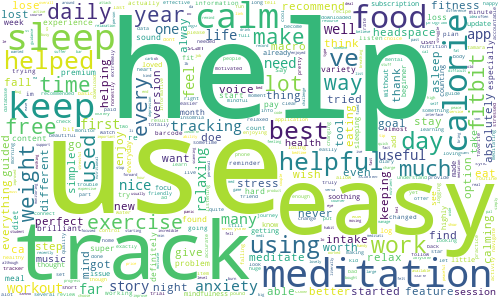

In [107]:

gcwordcloud = WordCloud(width=500, height=300, background_color="white", max_words=5000, contour_width=3, collocations=False,
                        contour_color='steelblue')

gcwordcloud.generate(good_clean_df['content'].to_string())

gcwordcloud.to_image()



In [108]:
goodcleantext =  str(list(good_clean_df['content']))

In [109]:
good_freq_clean = clean_freq(goodcleantext)

### 👀 Low Rated WordCloud

In [110]:
bad_clean_df = clean_df[clean_df['Target']=='bad']

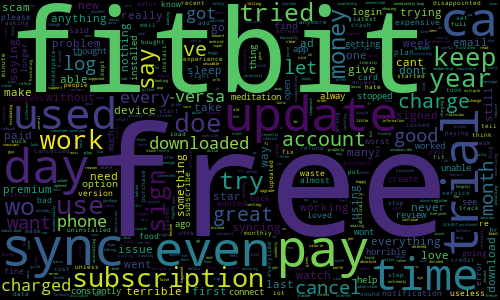

In [111]:
bcwordcloud = WordCloud(width=500, height=300, background_color="black", 
                        max_words=5000, contour_width=3, collocations=False, 
                        contour_color='steelblue')

bcwordcloud.generate(bad_clean_df['content'].to_string())

bcwordcloud.to_image()

In [112]:
#pulling it back together so can further clean less meaningful words:
bad_clean_df['content'] = bad_clean_df['content'].apply(lambda x: ' '.join(x))

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [116]:
#making a copy of the bad_clean_df to do some clustering analysis
bad_df = bad_clean_df.copy()

In [120]:
btfidf_vectorizer = TfidfVectorizer()
btfidf = btfidf_vectorizer.fit_transform(bad_clean_df['content'])

In [121]:
bkmeans5 = KMeans(n_clusters=5).fit(btfidf)

In [122]:
bad_df['5cluster'] = bkmeans5.labels_

In [123]:
bad_df['5cluster'].value_counts()

1    7135
0    2956
3    1770
4    1027
2    1006
Name: 5cluster, dtype: int64

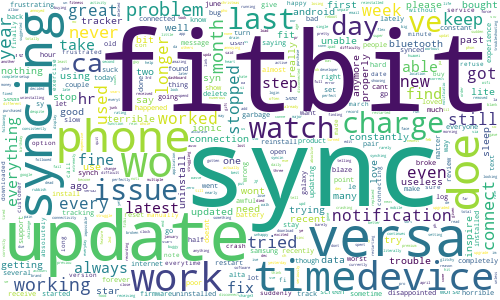

In [124]:
fivebadcluster0 = bad_df[bad_df['5cluster']== 0]
gcwordcloud = WordCloud(width=500, height=300, background_color="white", max_words=5000, contour_width=3, collocations=False,
                        contour_color='steelblue')

gcwordcloud.generate(fivebadcluster0['content'].to_string())

gcwordcloud.to_image()

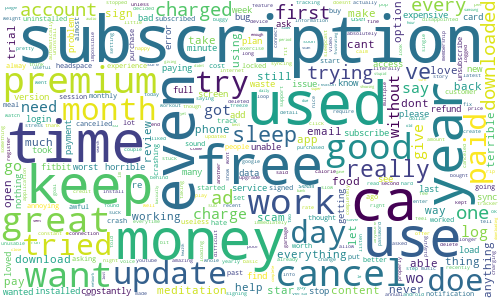

In [126]:
fivebadcluster1 = bad_df[bad_df['5cluster']== 1]
gcwordcloud = WordCloud(width=500, height=300, background_color="white", max_words=5000, contour_width=3, collocations=False,
                        contour_color='steelblue')

gcwordcloud.generate(fivebadcluster1['content'].to_string())

gcwordcloud.to_image()

In [ ]:
fivebadcluster2 = bad_df[bad_df['5cluster']== 2]
gcwordcloud = WordCloud(width=500, height=300, background_color="white", max_words=5000, contour_width=3, collocations=False,
                        contour_color='steelblue')

gcwordcloud.generate(fivebadcluster2['content'].to_string())

gcwordcloud.to_image()

In [ ]:
fivebadcluster3 = bad_df[bad_df['5cluster']== 3]
gcwordcloud = WordCloud(width=500, height=300, background_color="white", max_words=5000, contour_width=3, collocations=False,
                        contour_color='steelblue')

gcwordcloud.generate(fivebadcluster3['content'].to_string())

gcwordcloud.to_image()

In [ ]:
fivebadcluster4 = bad_df[bad_df['5cluster']== 4]
gcwordcloud = WordCloud(width=500, height=300, background_color="white", max_words=5000, contour_width=3, collocations=False,
                        contour_color='steelblue')

gcwordcloud.generate(fivebadcluster4['content'].to_string())

gcwordcloud.to_image()

In [ ]:
bad_df.head()

### Baseline Values: 

In [127]:
clean_df['Target'].value_counts(dropna=True, normalize=True)

good       0.40808
neutral    0.31404
bad        0.27788
Name: Target, dtype: float64

In [128]:
#pulling the strings back together
clean_df['content'].apply(lambda x: ' '.join(x))

0        care sleep story use white noise frequently th...
1        wonderful last month shut time woke last night...
2        great sleep meditation however wish option wav...
3        love world woo 2020 wanted upgrade long used f...
4        ca even try without creating login inside feat...
                               ...                        
49995    terrible updated premium bluetooth cant pair i...
49996    great idea everytime update fully reconnect wa...
49997    love fitbit happened go open mar 27th asking l...
49998    happy many different fitbits since 2014 husban...
49999    versa lite got xmas sync working ok never grea...
Name: content, Length: 50000, dtype: object

In [129]:
X = clean_df['content'].apply(lambda x: ' '.join(x))
y = clean_df['Target']

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=8)

In [132]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

## Various Classification Models, Multi NB, LinearSVC, LogReg

https://medium.com/syncedreview/applying-multinomial-naive-bayes-to-nlp-problems-a-practical-explanation-4f5271768ebf

 Laplace smoothing , which is a technique for smoothing categorical data. A small-sample correction, or pseudo-count, will be incorporated in every probability estimate. Consequently, no probability will be zero. this is a way of regularizing Naive Bayes, and when the pseudo-count is zero, it is called Laplace smoothing. While in the general case it is often called Lidstone smoothing.

In [133]:
nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB(alpha=6)),
              ])
nb.fit(X_train, y_train)


from sklearn.metrics import classification_report, accuracy_score
y_pred = nb.predict(X_test)

print('Accracy Score: %s' % round(accuracy_score(y_pred, y_test),2))
print(classification_report(y_test, y_pred))


Accracy Score: 0.72
              precision    recall  f1-score   support

         bad       0.77      0.67      0.72      4182
        good       0.76      0.92      0.84      6109
     neutral       0.61      0.51      0.56      4709

    accuracy                           0.73     15000
   macro avg       0.72      0.70      0.70     15000
weighted avg       0.72      0.72      0.72     15000



In [134]:
scaler = nb.named_steps['tfidf']
classifier = nb.named_steps['clf']



In [135]:
classifier.coef_

array([[ -8.77799203,  -9.54550846,  -9.96690834, ..., -10.05598694,
        -10.05598694,  -9.97704172],
       [ -9.8227343 ,  -9.36801322, -10.1063484 , ..., -10.07598946,
        -10.07598946, -10.1063484 ],
       [ -9.48815762,  -9.71346824, -10.08221672, ..., -10.08221672,
        -10.08221672, -10.08221672]])

# Remember to run this to get feature names

In [136]:
scaler.get_feature_names()

['00',
 '000',
 '00000',
 '00for',
 '01',
 '02',
 '021',
 '03',
 '04',
 '05',
 '06',
 '06082020',
 '07',
 '08',
 '09',
 '09miles',
 '0and',
 '10',
 '100',
 '1000',
 '10000',
 '1000000000',
 '1000x',
 '1006',
 '100aud',
 '100cad',
 '100e',
 '100g',
 '100lbs',
 '100m',
 '100mb',
 '100rs',
 '100x',
 '101',
 '1010rs',
 '102',
 '103',
 '103g',
 '105',
 '10500',
 '108',
 '108mb',
 '10am',
 '10attempts',
 '10day',
 '10days',
 '10e',
 '10ft',
 '10g',
 '10gb',
 '10hrs',
 '10k',
 '10kg',
 '10km',
 '10lb',
 '10lbs',
 '10m',
 '10miles',
 '10min',
 '10mins',
 '10pm',
 '10pounds',
 '10seconds',
 '10th',
 '10us',
 '10x',
 '10yrs',
 '11',
 '110',
 '1100',
 '1100kcal',
 '110g',
 '111minutes',
 '112',
 '113',
 '113g',
 '1143',
 '116bpm',
 '119',
 '11am',
 '11feb',
 '11hours',
 '11k',
 '11kg',
 '11lbs',
 '11pm',
 '11th',
 '11yrs',
 '12',
 '120',
 '1200',
 '12000',
 '1200cals',
 '120bpm',
 '120kcal',
 '120lbs',
 '1230',
 '124',
 '125',
 '126',
 '127',
 '129',
 '1290',
 '12am',
 '12days',
 '12eur',
 '12hrs

theorized that the best model for nlp is Linear Support Vector Machine..
https://scikit-learn.org/stable/modules/svm.html#svm-kernels

In [137]:
from sklearn.svm import LinearSVC

lSVC = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', LinearSVC(dual=False, random_state=42, max_iter=5)),
               ])
lSVC.fit(X_train, y_train)


y_pred = lSVC.predict(X_test)

print('Accracy Score: %s' % round(accuracy_score(y_pred, y_test),2))
print(classification_report(y_test, y_pred))


Accracy Score: 0.75
              precision    recall  f1-score   support

         bad       0.74      0.79      0.76      4182
        good       0.81      0.89      0.85      6109
     neutral       0.66      0.53      0.59      4709

    accuracy                           0.75     15000
   macro avg       0.73      0.74      0.73     15000
weighted avg       0.74      0.75      0.74     15000



In [138]:
lSVCscaler = lSVC.named_steps['tfidf']
lSVCclassifier = lSVC.named_steps['clf']

In [139]:
feats = lSVCscaler.get_feature_names()

# ✔️ TO DO:

In [145]:
def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
     
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()
    cv = CountVectorizer()
    cv.fit(data)
    print(len(cv.vocabulary_))
    print(cv.get_feature_names())
    X_train = cv.transform(data)
    
    svm = LinearSVC()
    svm.fit(X_train, target)
    plot_coefficients(svm, cv.get_feature_names())


AttributeError: 'TfidfVectorizer' object has no attribute 'coef_'

from https://medium.com/@aneesha/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d

In [148]:
lSVC = LinearSVC(dual=False, random_state=42, max_iter=5)

AttributeError: 'LinearSVC' object has no attribute 'coef_'

In [ ]:
lSVC.

In [150]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', SGDClassifier(loss='modified_huber', penalty='l2',alpha=.001, random_state=42, max_iter=6, tol=None)),
               ])
sgd.fit(X_train, y_train)


y_pred = sgd.predict(X_test)

print('Accracy Score: %s' % round(accuracy_score(y_pred, y_test),2))
print(classification_report(y_test, y_pred))


Accracy Score: 0.74
              precision    recall  f1-score   support

         bad       0.74      0.78      0.76      4182
        good       0.79      0.90      0.84      6109
     neutral       0.66      0.51      0.58      4709

    accuracy                           0.74     15000
   macro avg       0.73      0.73      0.73     15000
weighted avg       0.74      0.74      0.74     15000



In [ ]:
X_train.describe()

In [ ]:
X_train.isnull().sum()

In [ ]:
y_train.describe()

In [ ]:
y_train.isna().sum()

In [151]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5))])
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.7109333333333333
              precision    recall  f1-score   support

         bad       0.71      0.73      0.72      4182
        good       0.80      0.83      0.82      6109
     neutral       0.58      0.54      0.56      4709

    accuracy                           0.71     15000
   macro avg       0.70      0.70      0.70     15000
weighted avg       0.71      0.71      0.71     15000



In [ ]:
stop

# CLUSTERING on the entire corpus across all reviews:

Reference on KElbowVisualiser
https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

The K-Elbow Visualizer implements the “elbow” method of selecting the optimal number of clusters for K-means clustering. K-means is a simple unsupervised machine learning algorithm that groups data into a specified number (k) of clusters. Because the user must specify in advance what k to choose, the algorithm is somewhat naive – it assigns all members to k clusters even if that is not the right k for the dataset.

The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center. Other metrics can also be used such as the silhouette score, the mean silhouette coefficient for all samples or the calinski_harabasz score, which computes the ratio of dispersion between and within clusters.

When these overall metrics for each model are plotted, it is possible to visually determine the best value for k. If the line chart looks like an arm, then the “elbow” (the point of inflection on the curve) is the best value of k. The “arm” can be either up or down, but if there is a strong inflection point, it is a good indication that the underlying model fits best at that point.

>**WARNING**: FIRST VISUALIZER TAKES 2 HOURS TO RUN, SECOND TAKES 1

Result from KElbowVisualizer using distortion metric indicates 5 clusters, and silhouette indicates 6

In [152]:
import yellowbrick
from sklearn.feature_extraction.text import TfidfVectorizer

In [156]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

clean_content = clean_df['content'].apply(lambda x: ' '.join(x))

tfidf = TfidfVectorizer()

X = tfidf.fit_transform(clean_content)

tf_words = tfidf.get_feature_names()

In [157]:
len(tfidf.vocabulary_)

20380

Default metric for KElbowVisualizer is *Distortion score* which is calcluated by computing the sum of squared distances from each point to its assigned center

In [ ]:

model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(X)
visualizer.show()

In [ ]:
model1 = KMeans(random_state=0)
visualizer1 = KElbowVisualizer(model1, metric='silhouette', k=(2,10))

visualizer1.fit(X)
visualizer.show()

## KMeans models: 5 clusters v 6 clusters

In [158]:
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(X_train)



In [159]:
kmeans = KMeans(n_clusters=5).fit(tfidf)

In [155]:
preds = kmeans.predict(tfidf_vectorizer.transform(X_test))

In [ ]:
X_train

In [ ]:
xtrain = pd.DataFrame(X_train)

In [ ]:
xtrain['5cluster'] = kmeans.labels_

In [ ]:
#xtrain.drop('cluster',axis=1, inplace=True)

In [ ]:
xtrain.head()

In [ ]:
fivecluster1 = xtrain[xtrain['5cluster']== 1]

In [ ]:
type(fivecluster1)

In [ ]:
from nltk import FreqDist

In [ ]:
fivecluster1['content']

In [ ]:
clean_freq(fivecluster1text)

In [ ]:
gcwordcloud = WordCloud(width=500, height=300, background_color="white", max_words=5000, contour_width=3, collocations=False,
                        contour_color='steelblue')

gcwordcloud.generate(fivecluster1['content'].to_string())

gcwordcloud.to_image()

In [ ]:
fivecluster2 = xtrain[xtrain['5cluster']== 2]
gcwordcloud = WordCloud(width=500, height=300, background_color="white", max_words=5000, contour_width=3, collocations=False,
                        contour_color='steelblue')

gcwordcloud.generate(fivecluster2['content'].to_string())

gcwordcloud.to_image()

In [ ]:
fivecluster3 = xtrain[xtrain['5cluster']== 3]
gcwordcloud = WordCloud(width=500, height=300, background_color="white", max_words=5000, contour_width=3, collocations=False,
                        contour_color='steelblue')

gcwordcloud.generate(fivecluster3['content'].to_string())

gcwordcloud.to_image()

In [ ]:
fivecluster4 = xtrain[xtrain['5cluster']== 4]
gcwordcloud = WordCloud(width=500, height=300, background_color="white", max_words=5000, contour_width=3, collocations=False,
                        contour_color='steelblue')

gcwordcloud.generate(fivecluster4['content'].to_string())

gcwordcloud.to_image()

In [ ]:
fivecluster0 = xtrain[xtrain['5cluster']== 0]
gcwordcloud = WordCloud(width=500, height=300, background_color="white", max_words=5000, contour_width=3, collocations=False,
                        contour_color='steelblue')

gcwordcloud.generate(fivecluster0['content'].to_string())

gcwordcloud.to_image()

# Good, clean clusters

In [ ]:
kmeans6 = KMeans(n_clusters=6).fit(tfidf)

In [ ]:
xtrain['6cluster'] = kmeans6.labels_

In [ ]:
xtrain['5cluster'].value_counts()

In [ ]:
xtrain['6cluster'].value_counts()

In [ ]:
xtrain.head()

In [ ]:
kmeans.labels_

In [ ]:
preds

In [ ]:
def five_cluster_wrdcld(df['col']):
    cloud = {}
    for cluster in list(xtrain['5cluster'].unique()):
        clust_df = xtrain[xtrain['5cluster']==cluster]
            
        wrdcld5 = WordCloud(width=400, height=200, background_color="white", 
                            max_words=5000, contour_width=3, collocations=False, 
                            contour_color='steelblue')
        wrdcld5.generate(clust_df['content'].to_string())
        clustwrdcld = wrdcld5.to_image()
        fig = plt.imshow(clustwrdcld, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Cluster {cluster} WordCloud:')
        cloud[cluster]=fig
        plt.show()
    return cloud
    
    
    

In [ ]:
five_cluster_wrdcld()

In [ ]:
from collections import Counter, defaultdict


In [ ]:
print(Counter(.labels_))

In [ ]:
# kmean = Pipeline([('tfidf', TfidfVectorizer()),
#                 ('KMeans', KMeans(6)),
#                ])
# kmean.fit(X_train, y_train)


# y_pred = kmean.predict(X_test)

# print('Accracy Score: %s' % round(accuracy_score(y_pred, y_test),2))
# print(classification_report(y_test, y_pred))

In [ ]:
# import sklearn.metrics as metrics

# ks = range (1,12)
# inertia = []


# for k in ks:
#     model1 = KMeans(n_clusters=k)
#     model1.fit(X)
#     inertia.append(model.inertia_)
    
# plt.plot(ks, inertia)
# plt.xlabel('Number of Clusters')
# plt.ylabel('Inertia')
# plt.xticks(ks)
# plt.show()

https://medium.com/@rohithramesh1991/unsupervised-text-clustering-using-natural-language-processing-nlp-1a8bc18b048d

In [ ]:
#Label Encode and save for inverse_transform

#create a dictionary
encoders = {}

for col in cat_cols:
    #Instanciate labelencoder
    encoders[col] = LabelEncoder()
    #encode the categorical data
    df[col] = encoders[col].fit_transform(df[col])

df(cat_cols)

In [ ]:
col_nans = df.isna().sum(axis=0)
col_nans

In [ ]:
df1 = app_reviews_df.copy()

In [ ]:
df1.head()